# Random Walks en Alianzas de Aerolíneas

## Directorio

In [67]:
#Establecer directorio
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

## Paquetes

Se importan todos los paquetes que se necesitarán para las funciones y visualizaciones del proyecto.

In [68]:
#Para usar sample
using StatsBase

In [69]:
#Para cargar matrices de adyacencia
using DelimitedFiles

In [70]:
#Para graficar
using Plots

In [71]:
#Para poner una semilla en sample
using RandomNumbers.Xorshifts

In [ ]:
#No cargar
using Plotly

In [ ]:
using FreqTables

In [ ]:
using StatsPlots

In [ ]:
using RandomNumbers

In [ ]:
using Gadfly

## Funciones

### Importar datos

In [75]:
"""
    importar_matriz(file::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function importar_matriz(arch::AbstractString)
    archivo_R = readdlm(arch, ',') #readdlm("data/multi_17_du.csv", ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

importar_matriz

### Nombres de datos

In [83]:
"""
    data_names(M)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function data_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

data_names

### Grado

In [6]:
"""

    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

Implementación

#### Ejemplos
"""
function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree

In [7]:
"""
in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function in_degree(M::Array)
    grados_entrada = sum(M, dims = 2)
end

in_degree

In [8]:
"""
n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""
function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree

In [9]:
"""
    out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree

In [ ]:
"""
degree(M)

Función que obtiene el grado de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve el grado de la red, el cual es representado por un valor numérico de tipo Float64

## Implementación

### Ejemplos
"""

function degree(M::Array)
    
    grado_entrada = degree_in(M)
    
    grado_red = sum(grado_entrada) / length(grado_entrada) #Grado de la red, promedio de los grados
end

### Distribución de grado

In [10]:
"""
Función de distribución de grado de entrada
"""


function distrib_in_degree(M::Array)
    x = in_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_in_degree (generic function with 1 method)

In [11]:
"""
Función de distribución de grado de salida
"""

function distrib_out_degree(M::Array)
    x = out_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_out_degree (generic function with 1 method)

In [ ]:
"""
Función de distribución
"""

function distrib_degree(M::Array)
    x = degree(M)
    distribucion = Int64[]
    
    for i in 1:length(x)
        degree_count = count(x == i, x)
        push!(distribucion, degree_count)
    end
    distribucion
end

In [ ]:
#Hacer una función analize_distribution que nos dé el diccionario de frecuencias 
function analize_distribution(M::array, t)
    if x = 
    countmap()
end

In [153]:
function plot_distrib(M::Array, tipo::String, titulo::String, color::String)
    
    pyplot()
    
    if tipo == "in"
        distribucion = distrib_in_degree(M::Array)
    elseif tipo == "out"
        distribucion = distrib_out_degree(M::Array)
    end
    distribucion
    #@show distribucion
    graph = bar(distribucion, fillcolor = color, markersize = 3, linealpha = 0.5, 
    title = titulo, 
    xlabel = "Grado", 
    ylabel = "Frecuencia",
    xlims = (-10,300), #obtener límites
    ylims = (-10,1000)) #obtener límites
end

plot_distrib (generic function with 2 methods)

### Random walks

In [13]:
"""

    r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)

La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""
function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    
    nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f
    seed = 1

    for i in 1:iter
        paths[i, 1] = f
        
        for p in 1:steps 
            row = M[s, :] #Renglón correspondiente al nodo s
            vecinos = findall(x -> x != 0, row)
            
            if vecinos == []
                break
            else
                a = sample(Xoroshiro128Plus(seed), vecinos) 
                paths[i, p + 1] = a
                s = a
                seed += 1
            end
            
        end
        s = f
        
    end
    
    return paths 
end

r_walks (generic function with 1 method)

In [14]:
"""

    random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64)

La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""
function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) 
    
    random_walks = []
    nodos = size(M, 1)
    
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    
    random_walks
end

random_walk (generic function with 1 method)

### Longitud de caminatas

In [15]:
"""
La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""
function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                end
                
            end
            
            longz[j] = c - 1
            c = 0
            
        end
        
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    end
    return longitudes
end

walk_length (generic function with 1 method)

In [16]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""
function walk_av_length(W)
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    
    proms
end

walk_av_length (generic function with 1 method)

In [17]:
"""
Función que saca el promedio de longitud de caminata en la capa
"""
function walk_layer_length(W)
    
    x = walk_av_length(W)
    av = mean(x)
    
    return av
end

walk_layer_length (generic function with 1 method)

### Nodos/aeropuertos visitados

In [18]:
"""
La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""
function nodos_visitados(W)
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        
        push!(cobert, visit)
        visit = []
    end
    
    return cobert
end

nodos_visitados (generic function with 1 method)

In [ ]:
#Hacer una función que te muestre el nombre de los aeropuertos diferentes que visita
function aeropuertos_visitados
    aeropuertos = []
end

### Frecuencia de visitas

In [176]:
#Función que me haga un diccionario con frecuencias
function freq_visitas_nodos(W::Array)
    
    dicc = [] #arreglo vacío
    
    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0
    
    #for i = n
    for i in 1:nodos #corro por todos los nodos
        for j in 1:iter #corro por las iteraciones
            diccionario = countmap(W[i][j, :]) #hago diccionario de freqs de cada caminata
            push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
        end
        
        diccionario = 0
    end
    return dicc
end

freq_visitas_nodos (generic function with 1 method)

In [ ]:
#función que crea arreglo de arreglos con la distribución de frecuencia de visitas
function distrib_visitas_nodos(W)
    
    x = freq_visitas_nodos(W) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            
            
            f += 1
        end
        push!(frec_total, frec_nodo)
        
        f = 0
        frec_nodo = zeros(Int64, l+1)
        
    end
    
    return frec_total
end

In [ ]:
#función que hace un heatmap de nodos en los que cae, cada renglón corresponde a una caminata
function plot_visit_freq(W)
    
    pyplot()
    x = distrib_visitas_nodos(W)
    h = transpose(hcat(x...))

    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(x)]
    z = h
    heatmap(xs, ys, z, aspect_ratio=1)
end

In [ ]:
#Función que me haga un diccionario con frecuencias para un nodo inicial
function freq_visitas_nodo(W::Array, n)
    
    dicc = [] #arreglo vacío
    
    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0
    
    for j in 1:iter #corro por las iteraciones
          
        diccionario = countmap(W[n][j, :]) #hago diccionario de freqs de cada caminata
          
        push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
          
    end
    
    return dicc
end

In [ ]:
#función que crea arreglo de arreglos con la distribución de frecuencia de visitas de un nodo inicial
function distrib_visitas_nodo(W, n)
    
    x = freq_visitas_nodo(W, n) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            
            
            f += 1
        end
        push!(frec_total, frec_nodo)
        
        f = 0
        frec_nodo = zeros(Int64, l+1)
        
    end
    
    return frec_total
end

In [ ]:
#función que hace un heatmap de nodos en los que cae, cada renglón corresponde a una caminata con cierto nodo inicial
function plot_visit_freq_nodo(W, n)
    
    pyplot()
    x = distrib_visitas_nodo(W, n)
    h = transpose(hcat(x...))
    pasos = size(w[1],2)-1

    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(x)]
    z = h
    heatmap(xs, ys, z, aspect_ratio = 1, clims = (0, pasos))
end

In [ ]:
#Función que me haga distribución por nodo inicial y me muestra todos
function distrib_nodos_prom(W::Array)
    
    nodos = length(W) #número de nodos
    dicc = zeros(Float64, nodos, nodos+1) #arreglo ceros
    nombres = 0:1:nodos
    
    for i in 1:nodos #corro por todos los nodos
        conteos = counts(W[i]) #hago diccionario de freqs de cada caminata
        dicc[i,:] = conteos 
    end

    dicc
end

In [ ]:
#Función que me haga un diccionario con frecuencias por nodo inicial y me muestra todos
function plot_freq_nodos_prom(W::Array)
    
    pyplot()
    x = distrib_nodos_prom(W)
    
    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(W)]
    z = x
    heatmap(xs, ys, z, aspect_ratio = 1, clims = (0, maximum(x)))
end

In [ ]:
"""
Regresa los nodos que visitó y su frecuencia para cada iteración
??????????????????
"""
function frecuencia_visitas_it(W::Array)
    
    v = length(W)
    s = size(W[1], 1)
    t = size(W[1], 2)
    x = nodos_visitados(W)
    frecuencias = []
    frec = []

    for j in 1:v
        for k in 1:s
            u = counts(grado_entrada_SA[k], 1:length(grado_entrada_SA))    
            push!(frec, u)
        end
    push!(frecuencias, frec)
    end
    frecuencias
end

### Cobertura

In [19]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""
function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = nodos_visitados(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end


cobertura (generic function with 1 method)

In [20]:
"""
n_cobertura_av con parámetro W (caminatas) da el promedio de la caminata por nodo inicial. 
"""
function n_cobertura_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end


n_cobertura_av (generic function with 1 method)

In [21]:
"""
cobertura_av da el promedio de la longitud de las caminatas para todos los nodos, como un número.
"""
function cobertura_av(W)
    x = n_cobertura_av(W)
    promedio = mean(x)
    return promedio
end


cobertura_av (generic function with 1 method)

### Máximos y mínimos de longitud

In [22]:
"""
Da la longitud máxima de cada iteración de cada nodo inicial.
"""
function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end


max_length (generic function with 1 method)

In [23]:
"""
Da la longitud máxima total.
"""
function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end


Max_length (generic function with 1 method)

In [24]:
"""
Regresa el promedio de la longitud máxima de cada nodo inicial.
"""
function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end


av_max_length (generic function with 1 method)

In [25]:
"""
Da la longitud mínima de cada iteración de cada nodo inicial.
"""
function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end


min_length (generic function with 1 method)

In [26]:
"""
Da la longitud mínima total.
"""
function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end


Min_length (generic function with 1 method)

In [27]:
"""
Regresa el promedio de la longitud mínima de cada nodo inicial.
"""
function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end


av_min_length (generic function with 1 method)

### Endpoints

In [28]:
"""
Atractor regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""
function endpoints(W) 
    x = nodos_visitados(W)
    atractores = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos +1
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            if x[i][j, :][end][end] == 0
                at = x[i][j, :][end][end - 1]
                atract[j] = at
            else
                atract[j] = 0
            end
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end
    return atractores
end

atractor (generic function with 1 method)

In [29]:
"""
Función que calcula el promedio de atractores por nodo
"""
function av_n_endpoints(W) 
    
    x = atractor(W)
    atractores_prom = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos

    for i in 1:v        
        av = mean(x[i])
        push!(atractores_prom, av)
    end
    atractores_prom
end

av_n_atractor (generic function with 1 method)

### Distribución de frecuencia de endpoints

In [30]:
"""
Función que da un diccionario con frecuencias
"""

function freq_endpoints(W)
    freqs = []
    x = atractor(W)
    v = length(W)
    
    for i in 1:v
        frec = countmap(x[i])
        push!(freqs, frec)
    end
    freqs
end

freq_atractor (generic function with 1 method)

In [31]:
"""
Función que saca la distribución de los atractores para toda la capa
"""
function distrib_endpoints(W)
    x = freq_atractor(W)
    frec_total = zeros(Int64, length(W))
    frec_nodo = zeros(Int64, length(W))

    for i in 1:length(W)
        for j in 1:length(W)
            frec_nodo[j] = get(x[i], j, 0)
        end
        frec_total += frec_nodo
    end
    
    return frec_total
end

distrib_atractor

In [ ]:
#plot de endpoints

## Datos

### Multiplex Global

In [90]:
multiplex = importar_matriz("data/multi_17_du.csv")

3189×3189 Array{Int64,2}:
 0  0  0  1  0  0  0  1  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  1  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0

In [86]:
nombres_multiplex = data_names("data/multi_17_du.csv")

3189-element Array{Any,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"
 "AEX"
 "GCK"
 "MGM"

### Star Alliance

In [91]:
multiplex_SA = importar_matriz("data/multi_SA_du.csv")

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [92]:
nombres_SA = data_names("data/multi_SA_du.csv")

934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

### OneWorld

In [93]:
multiplex_OW = importar_matriz("data/multi_OW_du.csv")

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [94]:
nombres_OW = data_names("data/multi_OW_du.csv")

698-element Array{Any,1}:
 "EZE"
 "MIA"
 "PUJ"
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 ⋮    
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "KEM"
 "AAL"
 "SLA"
 "TUC"
 "IQT"
 "NJC"

### Sky Team

In [97]:
multiplex_ST = importar_matriz("data/multi_ST_du.csv")

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [96]:
nombres_ST = data_names("data/multi_ST_du.csv")

900-element Array{Any,1}:
 "AGF"
 "AJA"
 "AMS"
 "AUR"
 "BES"
 "BIA"
 "BIQ"
 "BLQ"
 "BOD"
 "BRU"
 "BVE"
 "CFE"
 "CFR"
 ⋮    
 "VCL"
 "VDH"
 "VII"
 "VKG"
 "ANR"
 "CWL"
 "DOL"
 "JER"
 "AOI"
 "PSA"
 "PWM"
 "ESB"

## Distribuciones de grado

### Multiplex Global

#### Grado de entrada

In [100]:
in_degree_multiplex = in_degree(multiplex);

In [ ]:
bar(hu, color="#0f87bf",alpha=0.4, title="Distribución Grado entrada", xlabel="Grado", ylabel="Frecuencia")

In [ ]:
histogram(hu, nb=10)

In [104]:
distrib_in_multiplex = distrib_in_degree(multiplex);

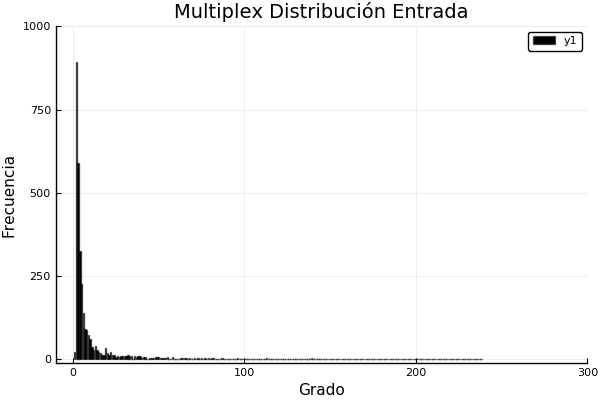

In [164]:
in_M = plot_distrib(multiplex, "in", "Multiplex Distribución Entrada", "black")

#### Grado de salida

In [101]:
out_degree_multiplex = out_degree(multiplex);

In [129]:
distrib_out_multiplex = distrib_out_degree(multiplex);

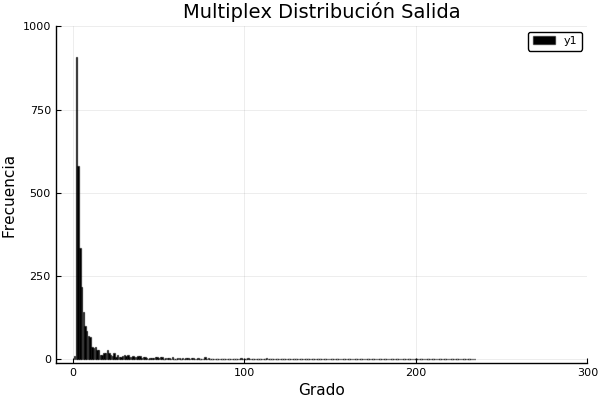

In [165]:
out_M = plot_distrib(multiplex, "out", "Multiplex Distribución Salida", "black")

### Star Alliance

#### Grado de entrada

In [131]:
in_degree_SA = in_degree(multiplex_SA);

In [132]:
distrib_in_SA = distrib_in_degree(multiplex_SA);

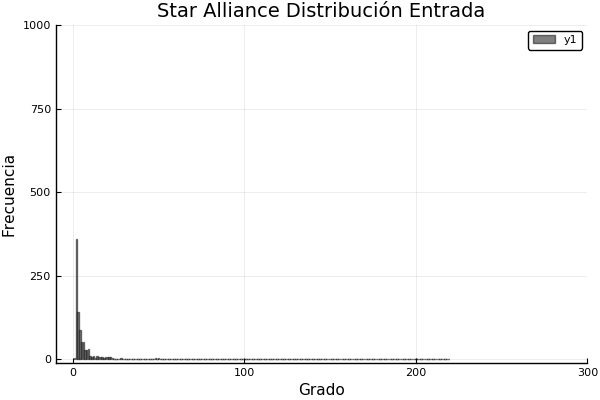

In [166]:
in_SA = plot_distrib(multiplex_SA, "in", "Star Alliance Distribución Entrada", "grey")

#### Grado de salida

In [137]:
out_degree_SA = out_degree(multiplex_SA);

In [138]:
distrib_out_SA = distrib_out_degree(multiplex_SA);

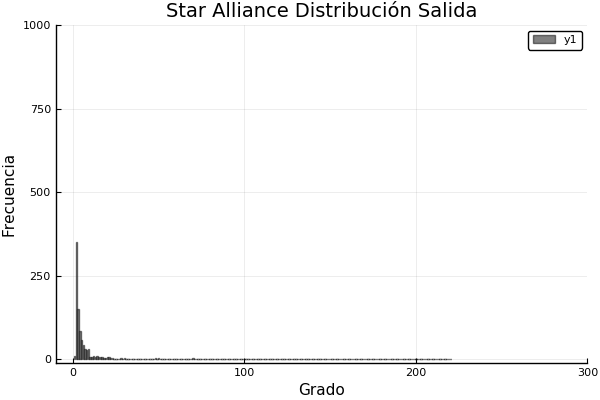

In [167]:
out_SA = plot_distrib(multiplex_SA, "out", "Star Alliance Distribución Salida", "grey")

### OneWorld

#### Grado de entrada

In [140]:
in_degree_OW = in_degree(multiplex_OW);

In [141]:
distrib_in_OW = distrib_in_degree(multiplex_OW);

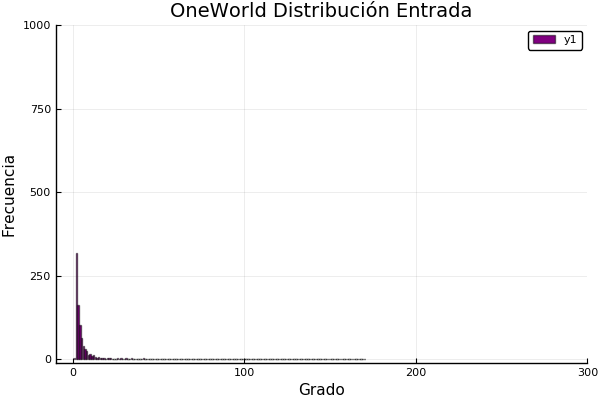

In [168]:
in_OW = plot_distrib(multiplex_OW, "in", "OneWorld Distribución Entrada", "purple")

#### Grado de Salida

In [147]:
out_degree_OW = out_degree(multiplex_OW);

In [148]:
distrib_out_OW = distrib_out_degree(multiplex_OW);

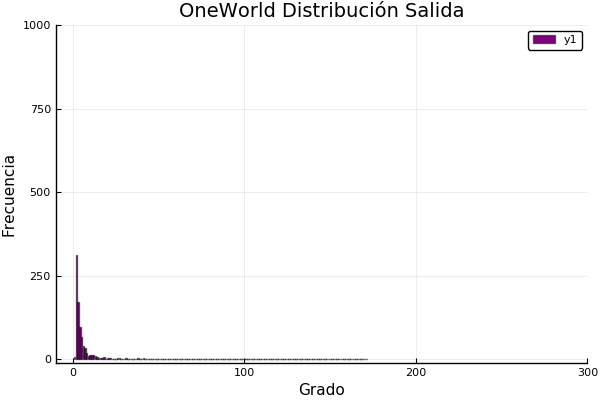

In [169]:
out_OW = plot_distrib(multiplex_OW, "out", "OneWorld Distribución Salida", "purple")

### Sky Team

#### Grado de entrada

In [156]:
in_degree_ST = in_degree(multiplex_ST);

In [157]:
distrib_in_ST = distrib_in_degree(multiplex_ST);

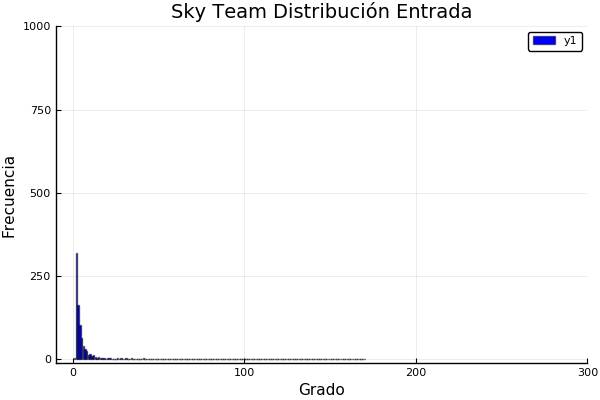

In [170]:
in_ST = plot_distrib(multiplex_ST, "in", "Sky Team Distribución Entrada", "blue")

#### Grado de salida

In [159]:
out_degree_ST = out_degree(multiplex_ST);

In [160]:
distrib_out_ST = distrib_out_degree(multiplex_ST);

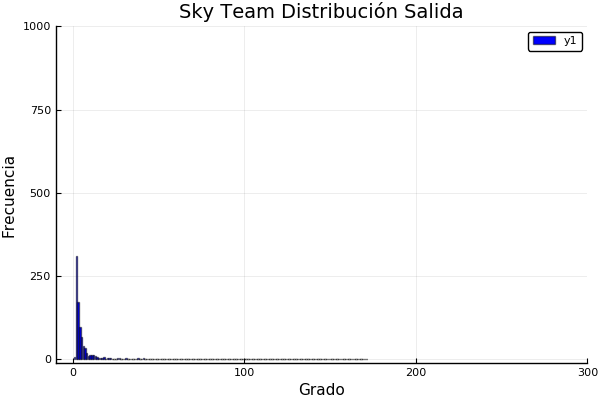

In [171]:
out_ST = plot_distrib(multiplex_ST, "out", "Sky Team Distribución Salida", "blue")

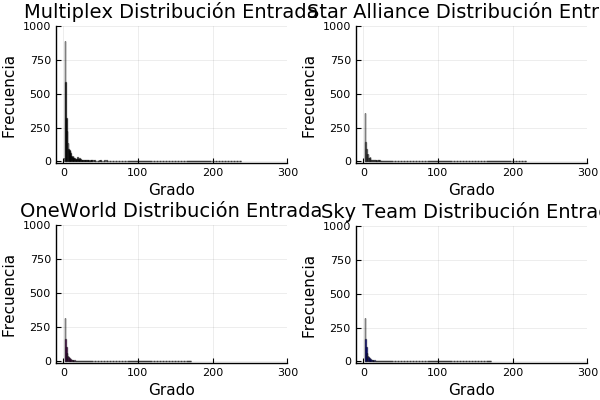

In [172]:
plot(in_M, in_SA, in_OW, in_ST, layout = (2, 2), legend = false)

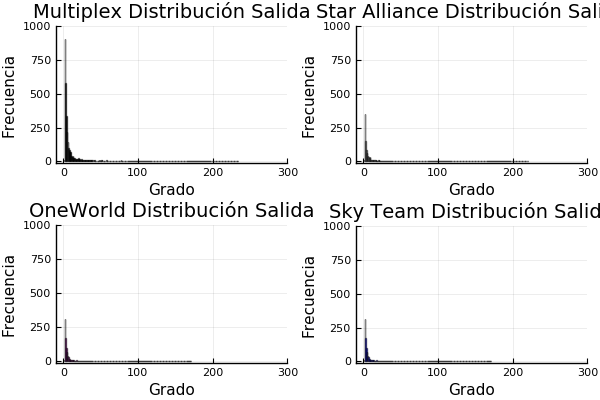

In [174]:
plot(out_M, out_SA, out_OW, out_ST, layout = (2, 2), legend = false)

In [175]:
d_in = groupedbar(in_M, in_SA, in_OW, in_ST, color = "#0f87bf", alpha = 0.8,
    title="Distribución Grado de Entrada", 
    xlabel="Grado", 
    ylabel="Frecuencia")
#bar!(d_in_SA,color="#0f87bf",alpha=0.4)
#bar!(d_in_OW,color="#0f00bf",alpha=0.4)
#bar!(d_in_ST,color="#0f50bf",alpha=0.4)

UndefVarError: UndefVarError: groupedbar not defined

## Caminatas aleatorias

### Multiplex

In [59]:
caminata_M = @time random_walk(multiplex, 50, 10)

276.316376 seconds (20.41 M allocations: 39.228 GiB, 4.34% gc time)


3189-element Array{Any,1}:
 [1 15 … 193 489; 1 998 … 1645 1651; … ; 1 15 … 597 595; 1 4 … 486 1031]        
 [2 594 … 2901 123; 2 1829 … 1364 2451; … ; 2 8 … 651 641; 2 1829 … 123 1150]   
 [3 244 … 1559 1550; 3 1752 … 3155 3157; … ; 3 14 … 2590 727; 3 594 … 1717 1511]
 [4 1226 … 722 1003; 4 457 … 53 439; … ; 4 358 … 2737 4; 4 1728 … 898 899]      
 [5 2408 … 193 489; 5 8 … 947 333; … ; 5 725 … 265 326; 5 671 … 486 1031]       
 [6 2282 … 193 489; 6 494 … 947 333; … ; 6 1015 … 2737 4; 6 304 … 2527 601]     
 [7 5 … 193 489; 7 684 … 3155 3157; … ; 7 193 … 997 453; 7 5 … 393 183]         
 [8 9 … 193 489; 8 1752 … 3155 3157; … ; 8 728 … 265 326; 8 90 … 1355 482]      
 [9 2 … 317 308; 9 751 … 251 154; … ; 9 183 … 1656 1627; 9 764 … 1355 482]      
 [10 4 … 722 1003; 10 358 … 359 566; … ; 10 724 … 997 453; 10 90 … 393 183]     
 [11 724 … 659 660; 11 727 … 171 1430; … ; 11 15 … 597 595; 11 4 … 486 1031]    
 [12 2797 … 1531 60; 12 15 … 53 439; … ; 12 594 … 2590 727; 12 349 … 1234 996]  
 

In [60]:
caminata2_M = @time random_walk(multiplex, 50, 10)

300.855601 seconds (20.41 M allocations: 39.228 GiB, 4.10% gc time)


3189-element Array{Any,1}:
 [1 15 … 193 489; 1 998 … 1645 1651; … ; 1 15 … 597 595; 1 4 … 486 1031]        
 [2 594 … 2901 123; 2 1829 … 1364 2451; … ; 2 8 … 651 641; 2 1829 … 123 1150]   
 [3 244 … 1559 1550; 3 1752 … 3155 3157; … ; 3 14 … 2590 727; 3 594 … 1717 1511]
 [4 1226 … 722 1003; 4 457 … 53 439; … ; 4 358 … 2737 4; 4 1728 … 898 899]      
 [5 2408 … 193 489; 5 8 … 947 333; … ; 5 725 … 265 326; 5 671 … 486 1031]       
 [6 2282 … 193 489; 6 494 … 947 333; … ; 6 1015 … 2737 4; 6 304 … 2527 601]     
 [7 5 … 193 489; 7 684 … 3155 3157; … ; 7 193 … 997 453; 7 5 … 393 183]         
 [8 9 … 193 489; 8 1752 … 3155 3157; … ; 8 728 … 265 326; 8 90 … 1355 482]      
 [9 2 … 317 308; 9 751 … 251 154; … ; 9 183 … 1656 1627; 9 764 … 1355 482]      
 [10 4 … 722 1003; 10 358 … 359 566; … ; 10 724 … 997 453; 10 90 … 393 183]     
 [11 724 … 659 660; 11 727 … 171 1430; … ; 11 15 … 597 595; 11 4 … 486 1031]    
 [12 2797 … 1531 60; 12 15 … 53 439; … ; 12 594 … 2590 727; 12 349 … 1234 996]  
 

In [ ]:
#Matriz que contiene 10 iteraciones de 100 pasos con nodo inicial 3
caminata_M[3]

### Star Alliance

In [ ]:
caminata_SA = @time random_walk(multiplexSA, 100, 10)

### OneWorld

In [ ]:
caminata_OW = @time random_walk(multiplexOW, 100, 10)

### Sky Team

In [ ]:
caminata_ST = @time random_walk(multiplexST, 100, 10)

## Longitud de todas las iteraciones de caminatas 

In [ ]:
li_M = @time walk_length(caminata_M)

In [ ]:
#Longitud de caminata de las 10 iteraciones correspondientes al nodo inicial 3
li_M[3]

In [ ]:
li_SA = @time walk_length(caminata_SA)

In [ ]:
li_OW = @time walk_length(caminata_OW)

In [ ]:
liST = @time walk_length(caminata_ST)

## Longitud promedio de las iteraciones de caminatas de cada nodo inicial

In [ ]:
lpn_M = @time walk_av_length(caminata_M)

In [ ]:
pyplot()
d_lpn_M = scatter(lpn_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_SA = @time walk_av_length(caminata_SA)

In [ ]:
pyplot()
d_lpn_SA = scatter(lpn_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_OW = @time walk_av_length(caminata_OW)

In [ ]:
pyplot()
d_lpn_OW = scatter(lpn_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_ST = @time walk_av_length(caminata_ST)

In [ ]:
pyplot()
d_lpn_ST = scatter(lpn_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
plot(d_lpn_M,d_lpn_SA,d_lpn_OW,d_lpn_ST,layout=(2,2),legend=false)

## Longitud promedio de caminatas por capa

In [ ]:
wl_M = @time walk_layer_length(caminata_M)

In [ ]:
wl_SA = @time walk_layer_length(caminata_SA)

In [ ]:
wl_OW = @time walk_layer_length(caminata_OW)

In [ ]:
wl_ST = @time walk_layer_length(caminata_ST)

In [ ]:
pyplot()
xx = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
yy = [wl_M, wl_SA, wl_OW, wl_ST]
d_wl = bar(xx, yy, color="#0f87bf",alpha=0.4, 
    title="Longitud caminatas por capa", 
    xlabel="Alianza", 
    ylabel="Long. prom.")
#bar!(xx[2], yy[2])
#bar!(xx[3], yy[3])
#bar!(xx[4], yy[4])

In [ ]:
#NO
pyplot()
histogram(lpn_SA, 
    nbins = 50, 
    title="Longitud promedio de caminata por nodo", 
    xlabel="Promedio por nodo", 
    ylabel="Frecuencia",
    xlims = (0, 110))
histogram!(lpn_OW, nbins=50, falpha=0.4)
histogram!(lpn_ST, nbins=50, falpha=0.3)

## Nodos visitados específicamente

In [ ]:
nv_M = @time nodos_visitados(caminata_M)

In [ ]:
#Nodos visitados (diferentes) en cada una de las 10 iteraciones con nodo inicial 3
nv_M[3]

In [ ]:
nv_SA = @time nodos_visitados(caminata_SA)

In [ ]:
nv_OW = @time nodos_visitados(caminata_OW)

In [ ]:
nv_ST = @time nodos_visitados(caminata_ST)

## Cobertura (nodos distintos)

In [ ]:
cobi_M = @time cobertura(caminata_M)

In [ ]:
#Número de nodos distintos que visita en cada iteración que se hizo con nodo inicial 3
cobi_M[3]

In [ ]:
cobi_SA = @time cobertura(caminata_SA)

In [ ]:
cobi_OW = @time cobertura(caminata_OW)

In [ ]:
cobi_ST = @time cobertura(caminata_ST)

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [ ]:
cobs_M = @time n_cobertura_av(caminata_M)

In [ ]:
d_cobs_M = scatter(cobs_M, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(M)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [ ]:
cobs_SA = @time n_cobertura_av(caminata_SA)

In [ ]:
d_cobs_SA = scatter(cobs_SA, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(SA)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [ ]:
cobs_OW = @time n_cobertura_av(caminata_OW)

In [ ]:
d_cobs_OW = scatter(cobs_OW, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(OW)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [ ]:
cobs_ST = @time n_cobertura_av(caminata_ST)

In [ ]:
d_cobs_ST = scatter(cobs_ST, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(ST)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [ ]:
plot(d_cobs_M,d_cobs_SA,d_cobs_OW,d_cobs_ST,layout=(2,2),legend=false)

In [ ]:
#NO

In [ ]:
cobs_SA = @time n_cobertura_av(caminata_SA)

In [ ]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(dif_SA)

In [ ]:
dif_SA

In [ ]:
b = bar(dif_SA,xlim=(0,90),color="#0f87bf",alpha=0.4)

In [ ]:
dif_OW = @time n_cobertura_av(caminata_OW)

In [ ]:
difOW = histogram(dif_OW, nbins=100,title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
dif_ST = @time n_cobertura_av(caminata_ST)

In [ ]:
difST = histogram(dif_ST,nbins=100, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

In [ ]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

In [ ]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [ ]:
cobp_M = @time cobertura_av(caminata_M)

In [ ]:
cobp_SA = @time cobertura_av(caminata_SA)

In [ ]:
cobp_OW = @time cobertura_av(caminata_OW)

In [ ]:
cobp_ST = @time cobertura_av(caminata_ST)

In [ ]:
x = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
y = [cobp_M, cobp_SA, cobp_OW, cobp_ST]
b = bar(x, y,
    color="#0f87bf",
    title="Cobertura promedio",
    xlabel="Alianzas",
    ylabel = "Promedio de cobertura por Alianza", 
    alpha=0.4)

## "Atractores"

In [ ]:
at_M = @time atractor(caminata_M)

In [ ]:
at_SA = @time atractor(caminata_SA)

In [ ]:
at_OW = @time atractor(caminata_OW)

In [ ]:
at_ST = @time atractor(caminata_ST)

## Frecuencia de atractores

In [ ]:
f_at_M = @time freq_atractor(caminata_M)

In [ ]:
#Frecuencia de atractores en las iteraciones de caminatas con nodo inicial 3
f_at_M[3]

In [ ]:
f_at_SA = @time freq_atractor(caminata_SA)

In [ ]:
f_at_OW = @time freq_atractor(caminata_OW)

In [ ]:
f_at_ST = @time freq_atractor(caminata_ST)

## Distribución atractores

In [ ]:
d_at_M = @time distrib_atractor(caminata_M)

In [ ]:
pyplot()
d_d_at_M = bar(d_at_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_SA = @time distrib_atractor(caminata_SA)

In [ ]:
pyplot()
d_d_at_SA = bar(d_at_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_OW = @time distrib_atractor(caminata_OW)

In [ ]:
pyplot()
d_d_at_OW = bar(d_at_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_ST = @time distrib_atractor(caminata_ST)

In [ ]:
pyplot()
d_d_at_ST = bar(d_at_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

### Pruebas para figurita de LANET

In [ ]:
rm10 = @time random_walk(multiplex, 10, 50)

In [ ]:
cm10 = cobertura_av(rm10)

In [ ]:
rm20 = @time random_walk(multiplex, 20, 50)

In [ ]:
cm20 = cobertura_av(rm20)

In [ ]:
rm30 = @time random_walk(multiplex, 30, 50)

In [ ]:
cobertura_av(rm30)

In [ ]:
rm40 = @time random_walk(multiplex, 40, 50)

In [ ]:
cobertura_av(rm40)

In [ ]:
rm50 = @time random_walk(multiplex, 50, 50)

In [ ]:
cobertura_av(rm50)

In [ ]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20]
ye = [cm10, cm20]
scatter(equis, ye, 
    xlims = (0, 300), ylims = (0, 300),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Total")

In [ ]:
a=1

In [ ]:
r10 = @time random_walk(multiplexSA, 10, 20)

In [ ]:
c10 = cobertura_av(r10)

In [ ]:
r15 = @time random_walk(multiplexSA, 15, 20)

In [ ]:
c15 = cobertura_av(r15)

In [ ]:
r20 = @time random_walk(multiplexSA, 20, 20)

In [ ]:
c20 = cobertura_av(r20)

In [ ]:
r30 = @time random_walk(multiplexSA, 30, 20)

In [ ]:
c30 = cobertura_av(r30)

In [ ]:
r40 = @time random_walk(multiplexSA, 40, 20)

In [ ]:
c40 = cobertura_av(r40)

In [ ]:
r50 = @time random_walk(multiplexSA, 50, 20)

In [ ]:
c50 = cobertura_av(r50)

In [ ]:
r60 = @time random_walk(multiplexSA, 60, 20)

In [ ]:
c60 = cobertura_av(r60)

In [ ]:
r70 = @time random_walk(multiplexSA, 70, 20)

In [ ]:
c70 = cobertura_av(r70)

In [ ]:
r80 = @time random_walk(multiplexSA, 80, 20)

In [ ]:
c80 = cobertura_av(r80)

In [ ]:
r90 = @time random_walk(multiplexSA, 90, 20)

In [ ]:
c90 = cobertura_av(r90)

In [ ]:
r100 = @time random_walk(multiplexSA, 100, 20)

In [ ]:
c100 = cobertura_av(r100)

In [ ]:
r110 = @time random_walk(multiplexSA, 110, 20)

In [ ]:
c110 = cobertura_av(r110)

In [ ]:
r150 = @time random_walk(multiplexSA, 150, 20)

In [ ]:
c150 = cobertura_av(r150)

In [ ]:
r200 = @time random_walk(multiplexSA, 200, 20)

In [ ]:
c200 = cobertura_av(r200)

In [ ]:
r300 = @time random_walk(multiplexSA, 300, 20)

In [ ]:
c300 = cobertura_av(r300)

In [ ]:
r400 = @time random_walk(multiplexSA, 400, 20)

In [ ]:
c400 = cobertura_av(r400)

In [ ]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 150, 200, 300, 400]
ye = [c10, c20, c30, c40, c50, c60, c70, c80, c90, c100, c110, c150, c200, c300, c400]
scatter(equis, ye, 
    xlims = (0, 400), ylims = (0, 400),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Star Alliance")

### Prueba histograma

In [ ]:
#Matriz
d = [0 1 0
     1 0 1
     0 0 0]

In [ ]:
#Caminata
rwd = random_walk(d, 3, 1)

In [ ]:
#Obtengo una de las iteraciones
uno=rwd[3]

In [ ]:
#Lista de nombres
nom_d = ["Nada", "Yuriko", "Tombo", "Sak"]

In [ ]:
#Nombres en el orden de la caminata
while i != 0
    
    nomuno=nom_d[uno]

In [ ]:
#Frecuencias de los números de las caminatas
his=counts(uno)

In [ ]:
#Gráfica de barras de x = nombres ordenados vs. y = frecuencias
bar(nom_d,his)

In [ ]:
dnan = [2 1 1
        1 2 1
        1 5 7]

In [ ]:
out_degree(dnan)

In [ ]:
as =counts(out_degree(dnan))

In [ ]:
count_zeros(as)

In [ ]:
?count

In [ ]:
countmap([4,4,13])

In [ ]:
rwdna = random_walk(dnan, 3, 1)

In [ ]:
#Con un histograma, tenemos colores distintos y leyenda para diferenciarlos
histogram(uno)
    #legend=)
#xticks=,
#yticks=)



In [ ]:
?histogram

In [ ]:
?bar

In [ ]:
c = random_walk(multiplexST, 100, 2)


#
j = sort(c[1][1,:])
x = nombres_ST[j]
h = countmap(x)
#histogram(h)
#hh=sort(h)

oh=hcat(hh)

bar(oh)

f=freqtable(j)

l = freqtable(x)

n =names(l)

typeof(l)

#bar(l)
bar(f,
    color="#0f87bf",
    title="Título",
    xlabel="Aeropuertos",
    ylabel = "Frecuencia de visitas", 
    #xticks = names(l),
    alpha=0.4)

prueba=

k = countmap(x)


get(k, 145, "NA")

freqtable(k)

histogram()

## 

In [ ]:
get(f_at_OW[1], 2, "NA")
f_at_OW[1]
f_at_OW[3]

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-3*x - (0.2*x))
aa = scatter(x, y, color="red",alpha=0.8, 
    title="Avianca", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-.7*x - (0.6*x))
bb = scatter(x, y, color="gray",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-0.50*x )
cc = scatter(x, y, color="#0f87bf",alpha=0.8, 
    title="Global", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
plot(aa,bb,cc,layout=(1,3),legend=false)

In [ ]:
count(i->(4<=i<=6), [2,3,4,5,6]) #dime cuántas veces se cumple la condición i in [4,6] en el arreglo